In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [25]:
hbr = pd.read_csv('haberman.csv', header=None, names=['Age', 'Operation_Year', 'Axil_Nodes', 'Surv_Status'])
hbr['Surv_Status'] = hbr['Surv_Status'].apply(lambda x: 'Survived' if x==1 else 'Not_Survived')
hbr.head()

,Age,Operation_Year,Axil_Nodes,Surv_Status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [26]:
hbr.shape

(306, 4)

### 306 Observations, 3 Features present in Dataset

In [27]:
hbr['Surv_Status'].value_counts()

Survived        225
Not_Survived     81
Name: Surv_Status, dtype: int64

### Observation: It's an Unbalanced dataset. Target Class 'Survived' has a much higher count (73.5%) than Class 'Not_Survived'.

### Objective:
- Analyze the basic features of the Dataset.
- Perform Univariate & Bi-Variate Data Analysis.
- Find best Feature(s) to classify the Observations.

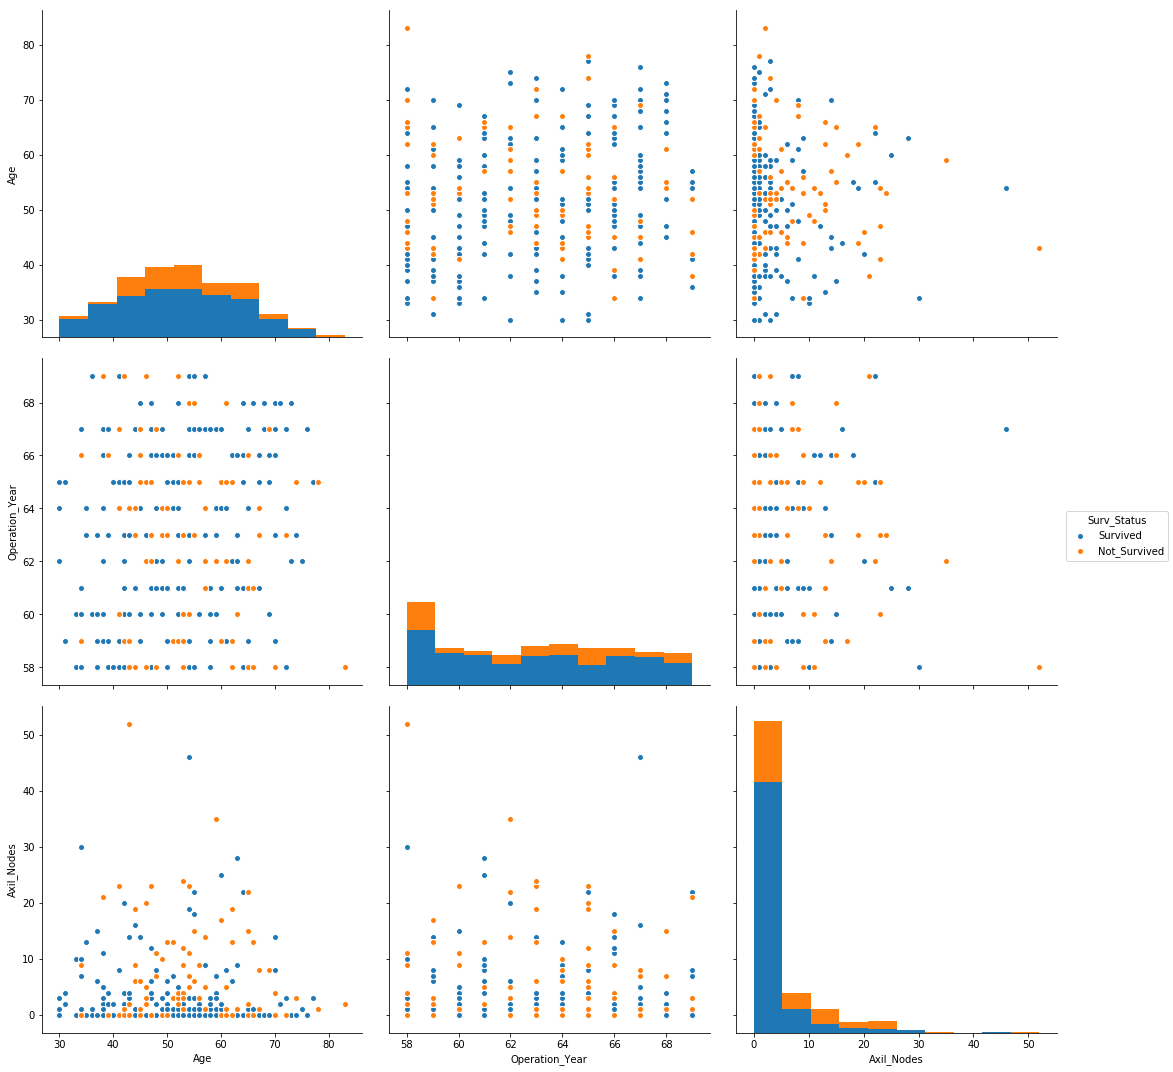

In [28]:
sns.pairplot(hbr, hue='Surv_Status', size=5, vars=['Age', 'Operation_Year', 'Axil_Nodes'])

#### Observations:
- The Survival rate decreases with increase in No. of affected Axilliary Nodes.
- Even though none of the Feature Pairs show a clear separation of the Target Classes, 'Axil_Nodes' seems to be the best candidate to determine Survival probability.

In [30]:
survived = hbr[hbr['Surv_Status'] == 'Survived']
not_survived = hbr[hbr['Surv_Status'] == 'Not_Survived']

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


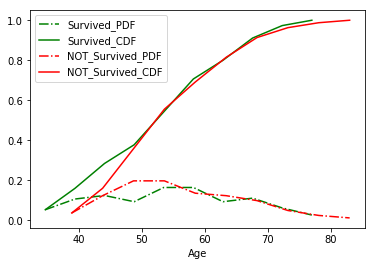

In [31]:
# Age - Survived
counts, bin_edges = np.histogram(survived['Age'], density=True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
line1, = plt.plot(bin_edges[1:], pdf, 'g-.', label='Survived_PDF')
line2, = plt.plot(bin_edges[1:], cdf, 'g-', label='Survived_CDF')

# Age - Not Survived
counts, bin_edges = np.histogram(not_survived['Age'], density=True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
line3, = plt.plot(bin_edges[1:], pdf, 'r-.', label='NOT_Survived_PDF')
line4, = plt.plot(bin_edges[1:], cdf, 'r-', label='NOT_Survived_CDF')

plt.xlabel('Age')
plt.legend()
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


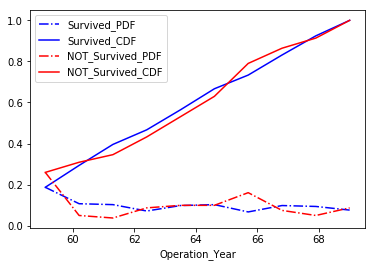

In [32]:
# Operation_Year - Survived
counts, bin_edges = np.histogram(survived['Operation_Year'], density=True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
line1, = plt.plot(bin_edges[1:], pdf, 'b-.', label='Survived_PDF')
line2, = plt.plot(bin_edges[1:], cdf, 'b-', label='Survived_CDF')

# Operation_Year - Not Survived
counts, bin_edges = np.histogram(not_survived['Operation_Year'], density=True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
line3, = plt.plot(bin_edges[1:], pdf, 'r-.', label='NOT_Survived_PDF')
line4, = plt.plot(bin_edges[1:], cdf, 'r-', label='NOT_Survived_CDF')

plt.xlabel('Operation_Year')
plt.legend()
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


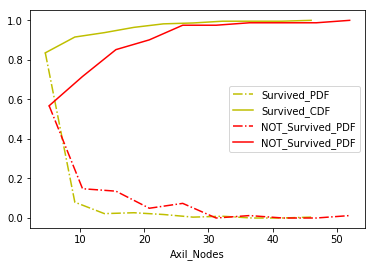

In [33]:
# Axil_Nodes - Survived
counts, bin_edges = np.histogram(survived['Axil_Nodes'], density=True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
line1, = plt.plot(bin_edges[1:], pdf, 'y-.', label='Survived_PDF')
line2, = plt.plot(bin_edges[1:], cdf, 'y-', label='Survived_CDF')

# Axil_Nodes - Not Survived
counts, bin_edges = np.histogram(not_survived['Axil_Nodes'], density=True)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
line3, = plt.plot(bin_edges[1:], pdf, 'r-.', label='NOT_Survived_PDF')
line4, = plt.plot(bin_edges[1:], cdf, 'r-', label='NOT_Survived_PDF')

plt.xlabel('Axil_Nodes')
plt.legend()
plt.show()

#### Observation:
- Survival probability is higher for Axil_Nodes < ~25.
- For other Plots, the two classes cannot be linearly separated.

In [34]:
hbr.describe()

,Age,Operation_Year,Axil_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


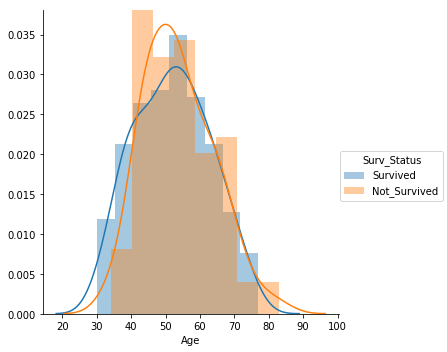

In [35]:
sns.FacetGrid(data=hbr, hue='Surv_Status', size=5)\
    .map(sns.distplot, 'Age')\
    .add_legend()
plt.show()

#### Observation:
- Survival probability between ages 40 and 60 is lower compared to ages < 40.
- Also with age > 70, the survival rate decreases.

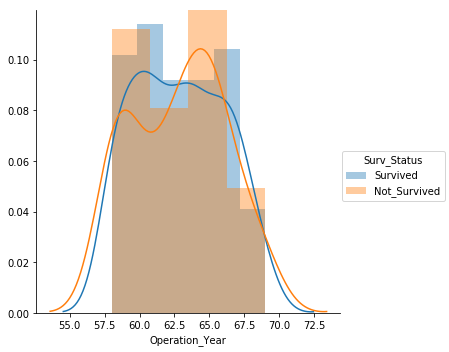

In [36]:
sns.FacetGrid(data=hbr, hue='Surv_Status', size=5)\
    .map(sns.distplot, 'Operation_Year')\
    .add_legend()
plt.show()

#### Observation:
- Survival rate has improved over the years with the exception of time period 62.5-66 where the persons not surviving has peaked.

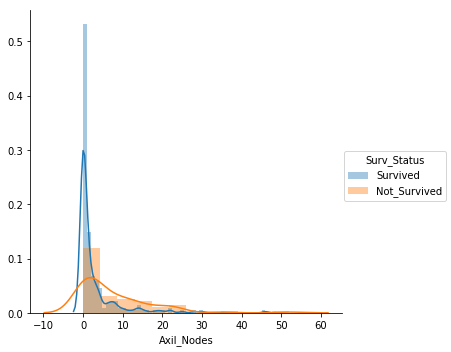

In [37]:
sns.FacetGrid(data=hbr, hue='Surv_Status', size=5)\
    .map(sns.distplot, 'Axil_Nodes')\
    .add_legend()
plt.show()

#### Observation:
- It is clear from the above graph, that the Survival probability is much higher when the no. of Axil Nodes affected is lower. As Axil Nodes increases the Survival rate drops xponentially.
- None of the Features show clear seggregation between the Target Classes - 'Survived' & 'Not_Survived'.
- Separating the Target Classes is difficult as all of the features have considerable overlap between the Classes. However, we were able to derive inferences based on the distribution of data.